# **Anomaly detection**


Detecting anomalies in the Cavum Septi Pellucidi **(CSP)** and Lateral Ventricles      **(LV)** during fetal ultrasounds is crucial for ensuring the healthy development of the brain. The CSP and LV are key indicators of normal brain structure, and any abnormalities can signal serious conditions such as neural tube defects, ventriculomegaly, or agenesis of the corpus callosum. Early detection of these anomalies allows for timely intervention, better prenatal care, and informed decision-making for parents and healthcare providers, ultimately improving the outcome for both mother and child.

In [1]:
!nvidia-smi

Sat Aug 24 07:48:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Importing libraries**

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5845.9/8062.4 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

ModuleNotFoundError: No module named 'ultralytics'

# **DATA**

For better detection of anomalies in the Cavum Septi Pellucidi (CSP) and Lateral Ventricles (LV), our project focused on analyzing ultrasound data from three critical planes: 
1. transventricular
2. transcerebellum 
3. transthalamic

These planes are essential for comprehensive fetal brain assessments as they provide different perspectives on the brain's structure.

The data is composed of ultrasound images that capture the CSP and LV across these planes, enabling a more accurate and reliable detection of potential anomalies. By leveraging these distinct views, we enhance our ability to detect and diagnose abnormalities early, improving prenatal care outcomes.

teh data is extracted from EU Open Research Repository

In [4]:
import os

# Define the base path for the data directory
base_path = '/kaggle/working/data'

# Create the main 'data' directory if it doesn't exist
os.makedirs(base_path, exist_ok=True)

# Define the subdirectories to be created
subdirectories = ['train', 'test', 'valid']

# Create the subdirectories inside 'data'
for subdir in subdirectories:
    os.makedirs(os.path.join(base_path, subdir), exist_ok=True)

print("Folder structure created:")
print(f"{base_path}/train")
print(f"{base_path}/test")
print(f"{base_path}/valid")


Folder structure created:
/kaggle/working/data/train
/kaggle/working/data/test
/kaggle/working/data/valid


# **Data splitting**

To ensure the robustness and accuracy of our anomaly detection model for the Cavum Septi Pellucidi (CSP) and Lateral Ventricles (LV), we carefully processed and organized the ultrasound data by splitting it into separate train, test, and validation sets. Within each of these sets, the data is further divided into corresponding folders for the transventricular, transcerebellum, and transthalamic planes.

This structure allows us to maintain the unique characteristics of each plane, providing a comprehensive representation of the fetal brain in all stages of model training and evaluation. 

In [3]:
import os
import shutil
import random

# Define source and destination paths
source_path = '/kaggle/input/fetal-ultrasound-planes/Ultrasounds/Trans-cerebellum/Images'
destination_base_path = '/kaggle/working/data'

# Define the split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Create destination directories
dest_train = os.path.join(destination_base_path, 'train', 'Trans-cerebellum')
dest_valid = os.path.join(destination_base_path, 'valid', 'Trans-cerebellum')
dest_test = os.path.join(destination_base_path, 'test', 'Trans-cerebellum')

for directory in [dest_train, dest_valid, dest_test]:
    os.makedirs(directory, exist_ok=True)

# List all files in the source directory
files = os.listdir(source_path)

# Shuffle the list of files
random.shuffle(files)

# Calculate the number of images for each split
total_files = len(files)
num_train = int(total_files * train_ratio)
num_valid = int(total_files * valid_ratio)
num_test = total_files - num_train - num_valid  # Ensure all files are used

# Split the files
train_files = files[:num_train]
valid_files = files[num_train:num_train + num_valid]
test_files = files[num_train + num_valid:]

# Copy files to the corresponding directories
def copy_files(file_list, dest_directory):
    for file_name in file_list:
        src_file = os.path.join(source_path, file_name)
        dst_file = os.path.join(dest_directory, file_name)
        shutil.copy(src_file, dst_file)

# Copy the images
copy_files(train_files, dest_train)
copy_files(valid_files, dest_valid)
copy_files(test_files, dest_test)

print("Images split and copied successfully.")


Images split and copied successfully.


In [4]:
import os
import shutil
import random

# Define source and destination paths
source_path = '/kaggle/input/fetal-ultrasound-planes/Ultrasounds/Trans-thalamic/Images'
destination_base_path = '/kaggle/working/data'

# Define the split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Create destination directories
dest_train = os.path.join(destination_base_path, 'train', 'Trans-thalamic')
dest_valid = os.path.join(destination_base_path, 'valid', 'Trans-thalamic')
dest_test = os.path.join(destination_base_path, 'test', 'Trans-thalamic')

for directory in [dest_train, dest_valid, dest_test]:
    os.makedirs(directory, exist_ok=True)

# List all files in the source directory
files = os.listdir(source_path)

# Shuffle the list of files
random.shuffle(files)

# Calculate the number of images for each split
total_files = len(files)
num_train = int(total_files * train_ratio)
num_valid = int(total_files * valid_ratio)
num_test = total_files - num_train - num_valid  # Ensure all files are used

# Split the files
train_files = files[:num_train]
valid_files = files[num_train:num_train + num_valid]
test_files = files[num_train + num_valid:]

# Copy files to the corresponding directories
def copy_files(file_list, dest_directory):
    for file_name in file_list:
        src_file = os.path.join(source_path, file_name)
        dst_file = os.path.join(dest_directory, file_name)
        shutil.copy(src_file, dst_file)

# Copy the images
copy_files(train_files, dest_train)
copy_files(valid_files, dest_valid)
copy_files(test_files, dest_test)

print("Images split and copied successfully.")


Images split and copied successfully.


In [5]:
import os
import shutil
import random

# Define source and destination paths
source_path = '/kaggle/input/fetal-ultrasound-planes/Ultrasounds/Trans-ventricular/Images'
destination_base_path = '/kaggle/working/data'

# Define the split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Create destination directories
dest_train = os.path.join(destination_base_path, 'train', 'Trans-ventricular')
dest_valid = os.path.join(destination_base_path, 'valid', 'Trans-ventricular')
dest_test = os.path.join(destination_base_path, 'test', 'Trans-ventricular')

for directory in [dest_train, dest_valid, dest_test]:
    os.makedirs(directory, exist_ok=True)

# List all files in the source directory
files = os.listdir(source_path)

# Shuffle the list of files
random.shuffle(files)

# Calculate the number of images for each split
total_files = len(files)
num_train = int(total_files * train_ratio)
num_valid = int(total_files * valid_ratio)
num_test = total_files - num_train - num_valid  # Ensure all files are used

# Split the files
train_files = files[:num_train]
valid_files = files[num_train:num_train + num_valid]
test_files = files[num_train + num_valid:]

# Copy files to the corresponding directories
def copy_files(file_list, dest_directory):
    for file_name in file_list:
        src_file = os.path.join(source_path, file_name)
        dst_file = os.path.join(dest_directory, file_name)
        shutil.copy(src_file, dst_file)

# Copy the images
copy_files(train_files, dest_train)
copy_files(valid_files, dest_valid)
copy_files(test_files, dest_test)

print("Images split and copied successfully.")


Images split and copied successfully.


# **Plane classification**

The first step in our approach was to train our model to distinguish between the different ultrasound planes—transventricular, transcerebellum, and transthalamic.

This classification task was essential for ensuring that the model could accurately recognize and differentiate between these key perspectives of the fetal brain. By first teaching the model to classify the planes, we established a solid foundation for more advanced tasks.

This initial classification step was crucial for improving the model's overall performance and ensuring that it can make precise and informed assessments in subsequent stages.

In [6]:
!yolo task=classify mode=train model=yolov8s-cls.pt data=/kaggle/working/data epochs=50 imgsz=800 plots=True


100%|██████████████████████████████████████| 12.2M/12.2M [00:00<00:00, 56.2MB/s]
New https://pypi.org/project/ultralytics/8.2.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/kaggle/working/data, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1

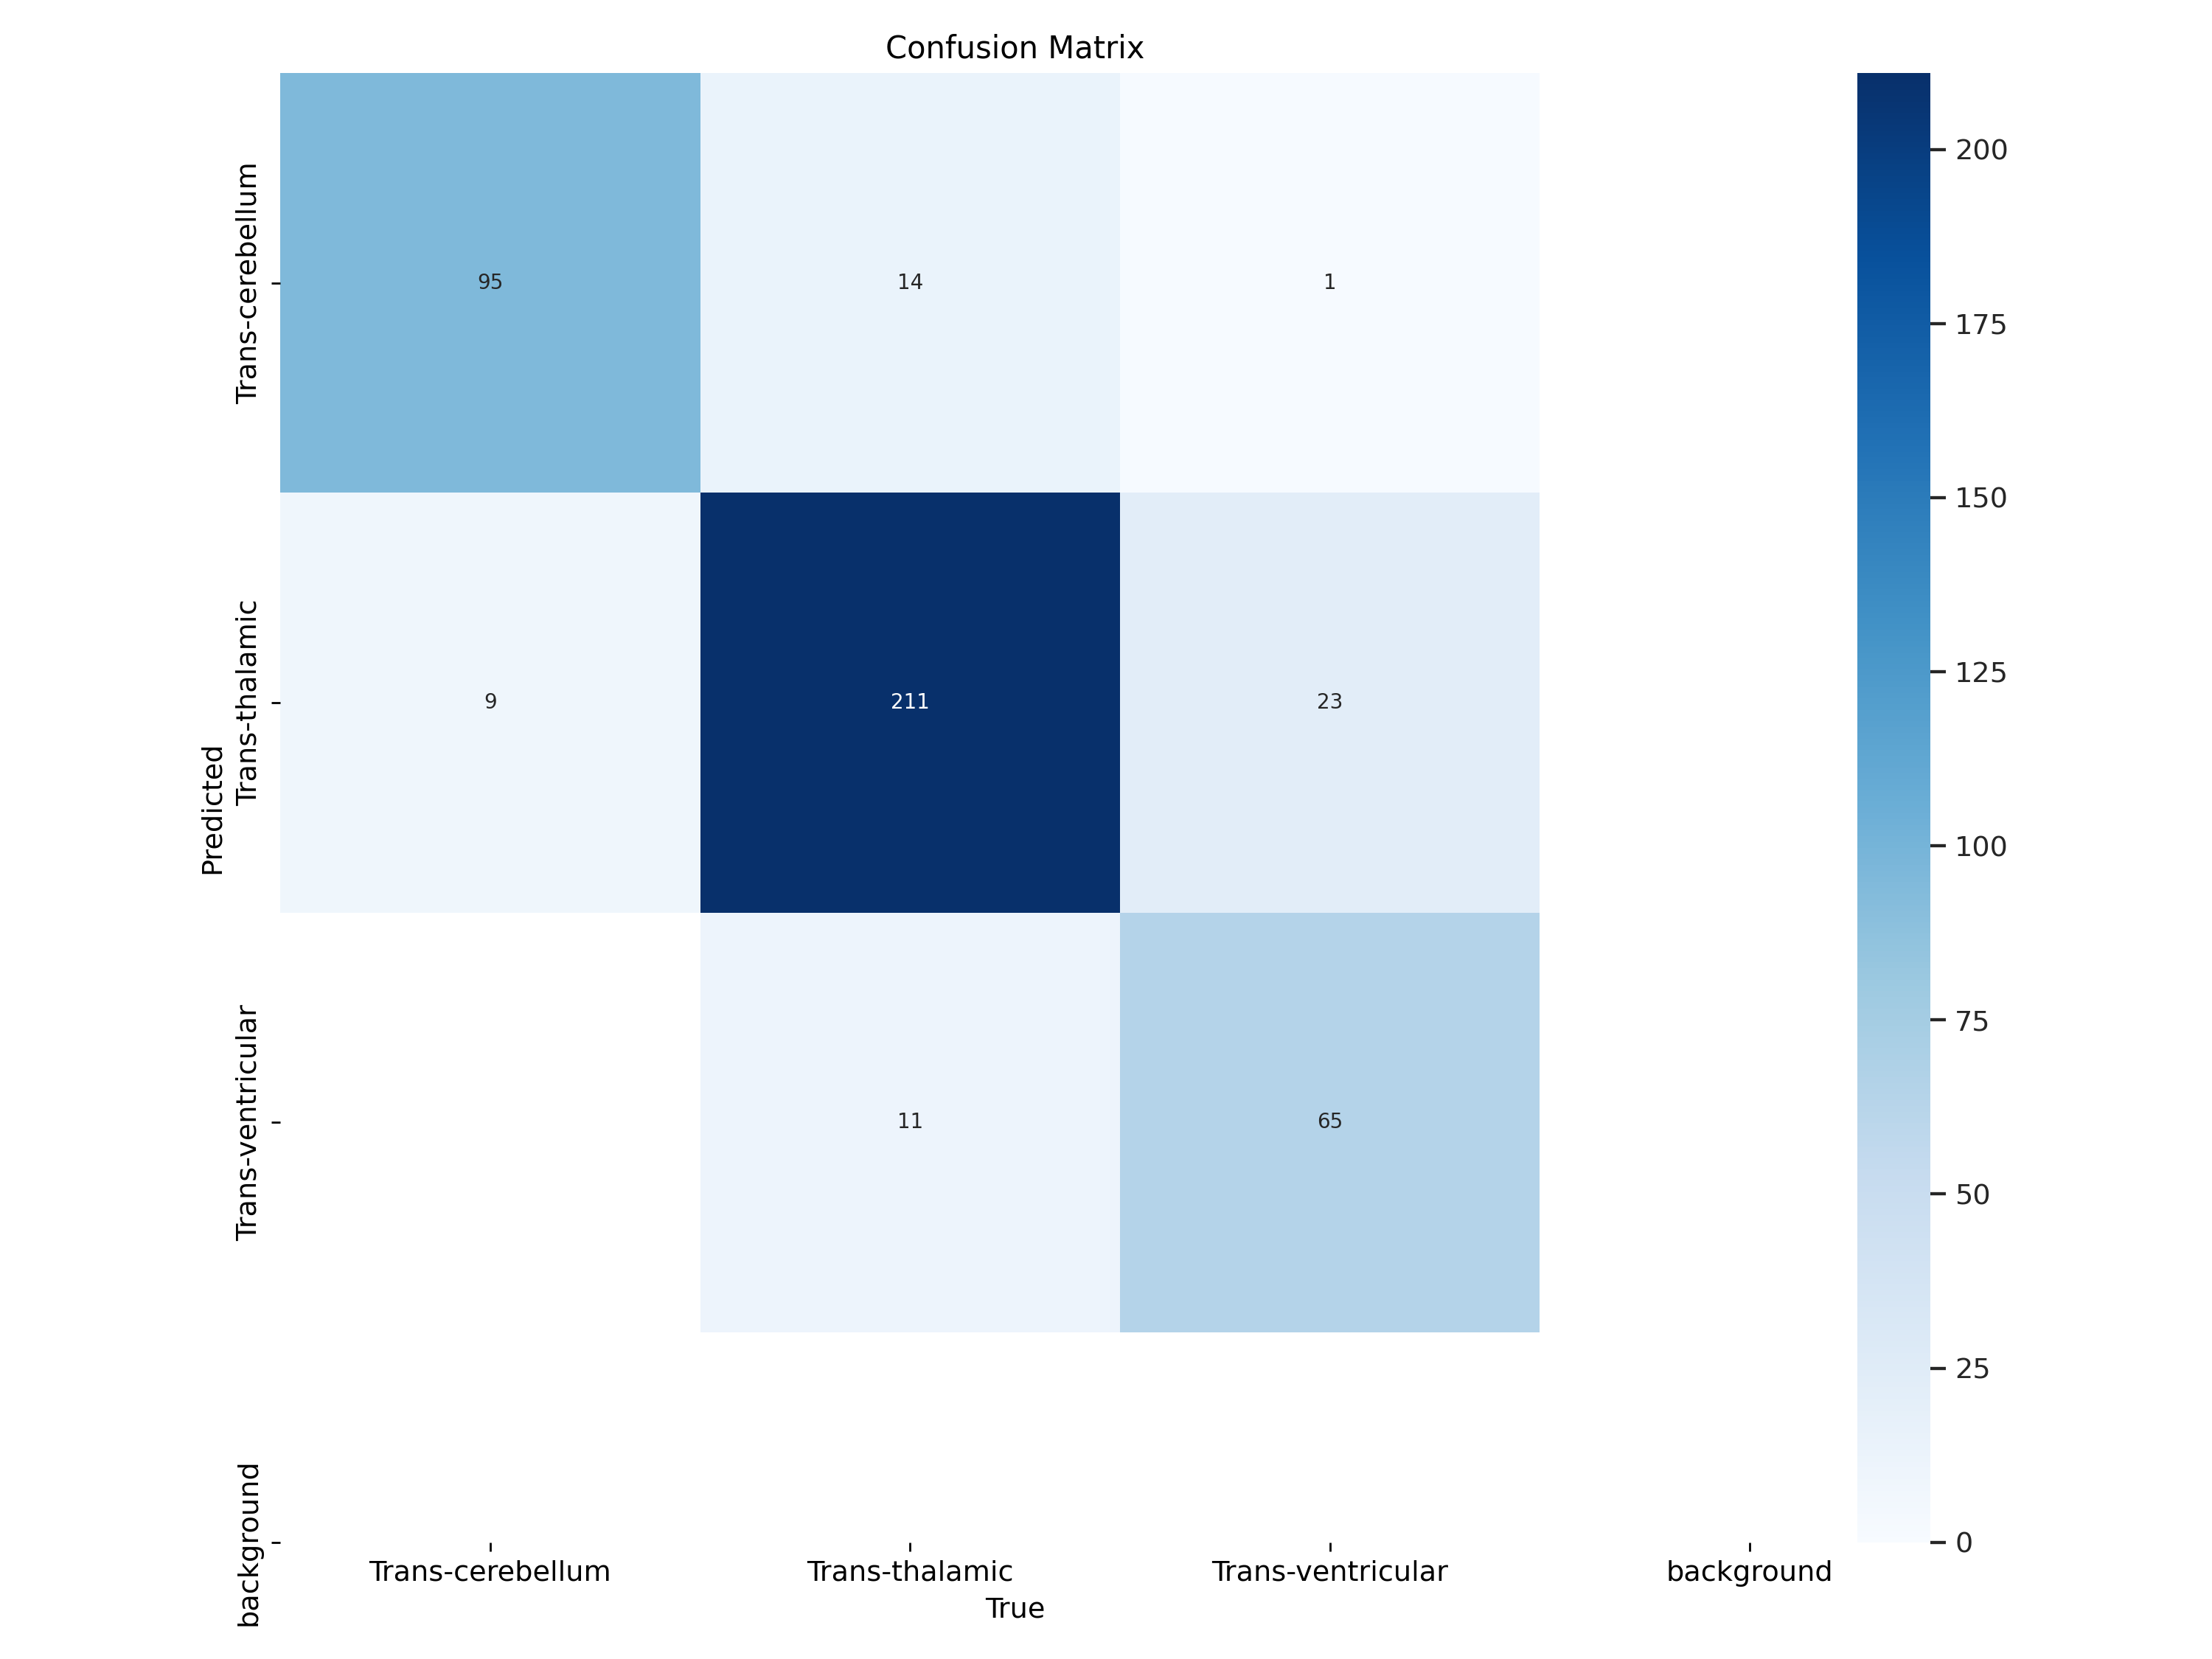

In [11]:
Image(filename=f'/kaggle/working/runs/classify/train3/confusion_matrix.png', width=600)

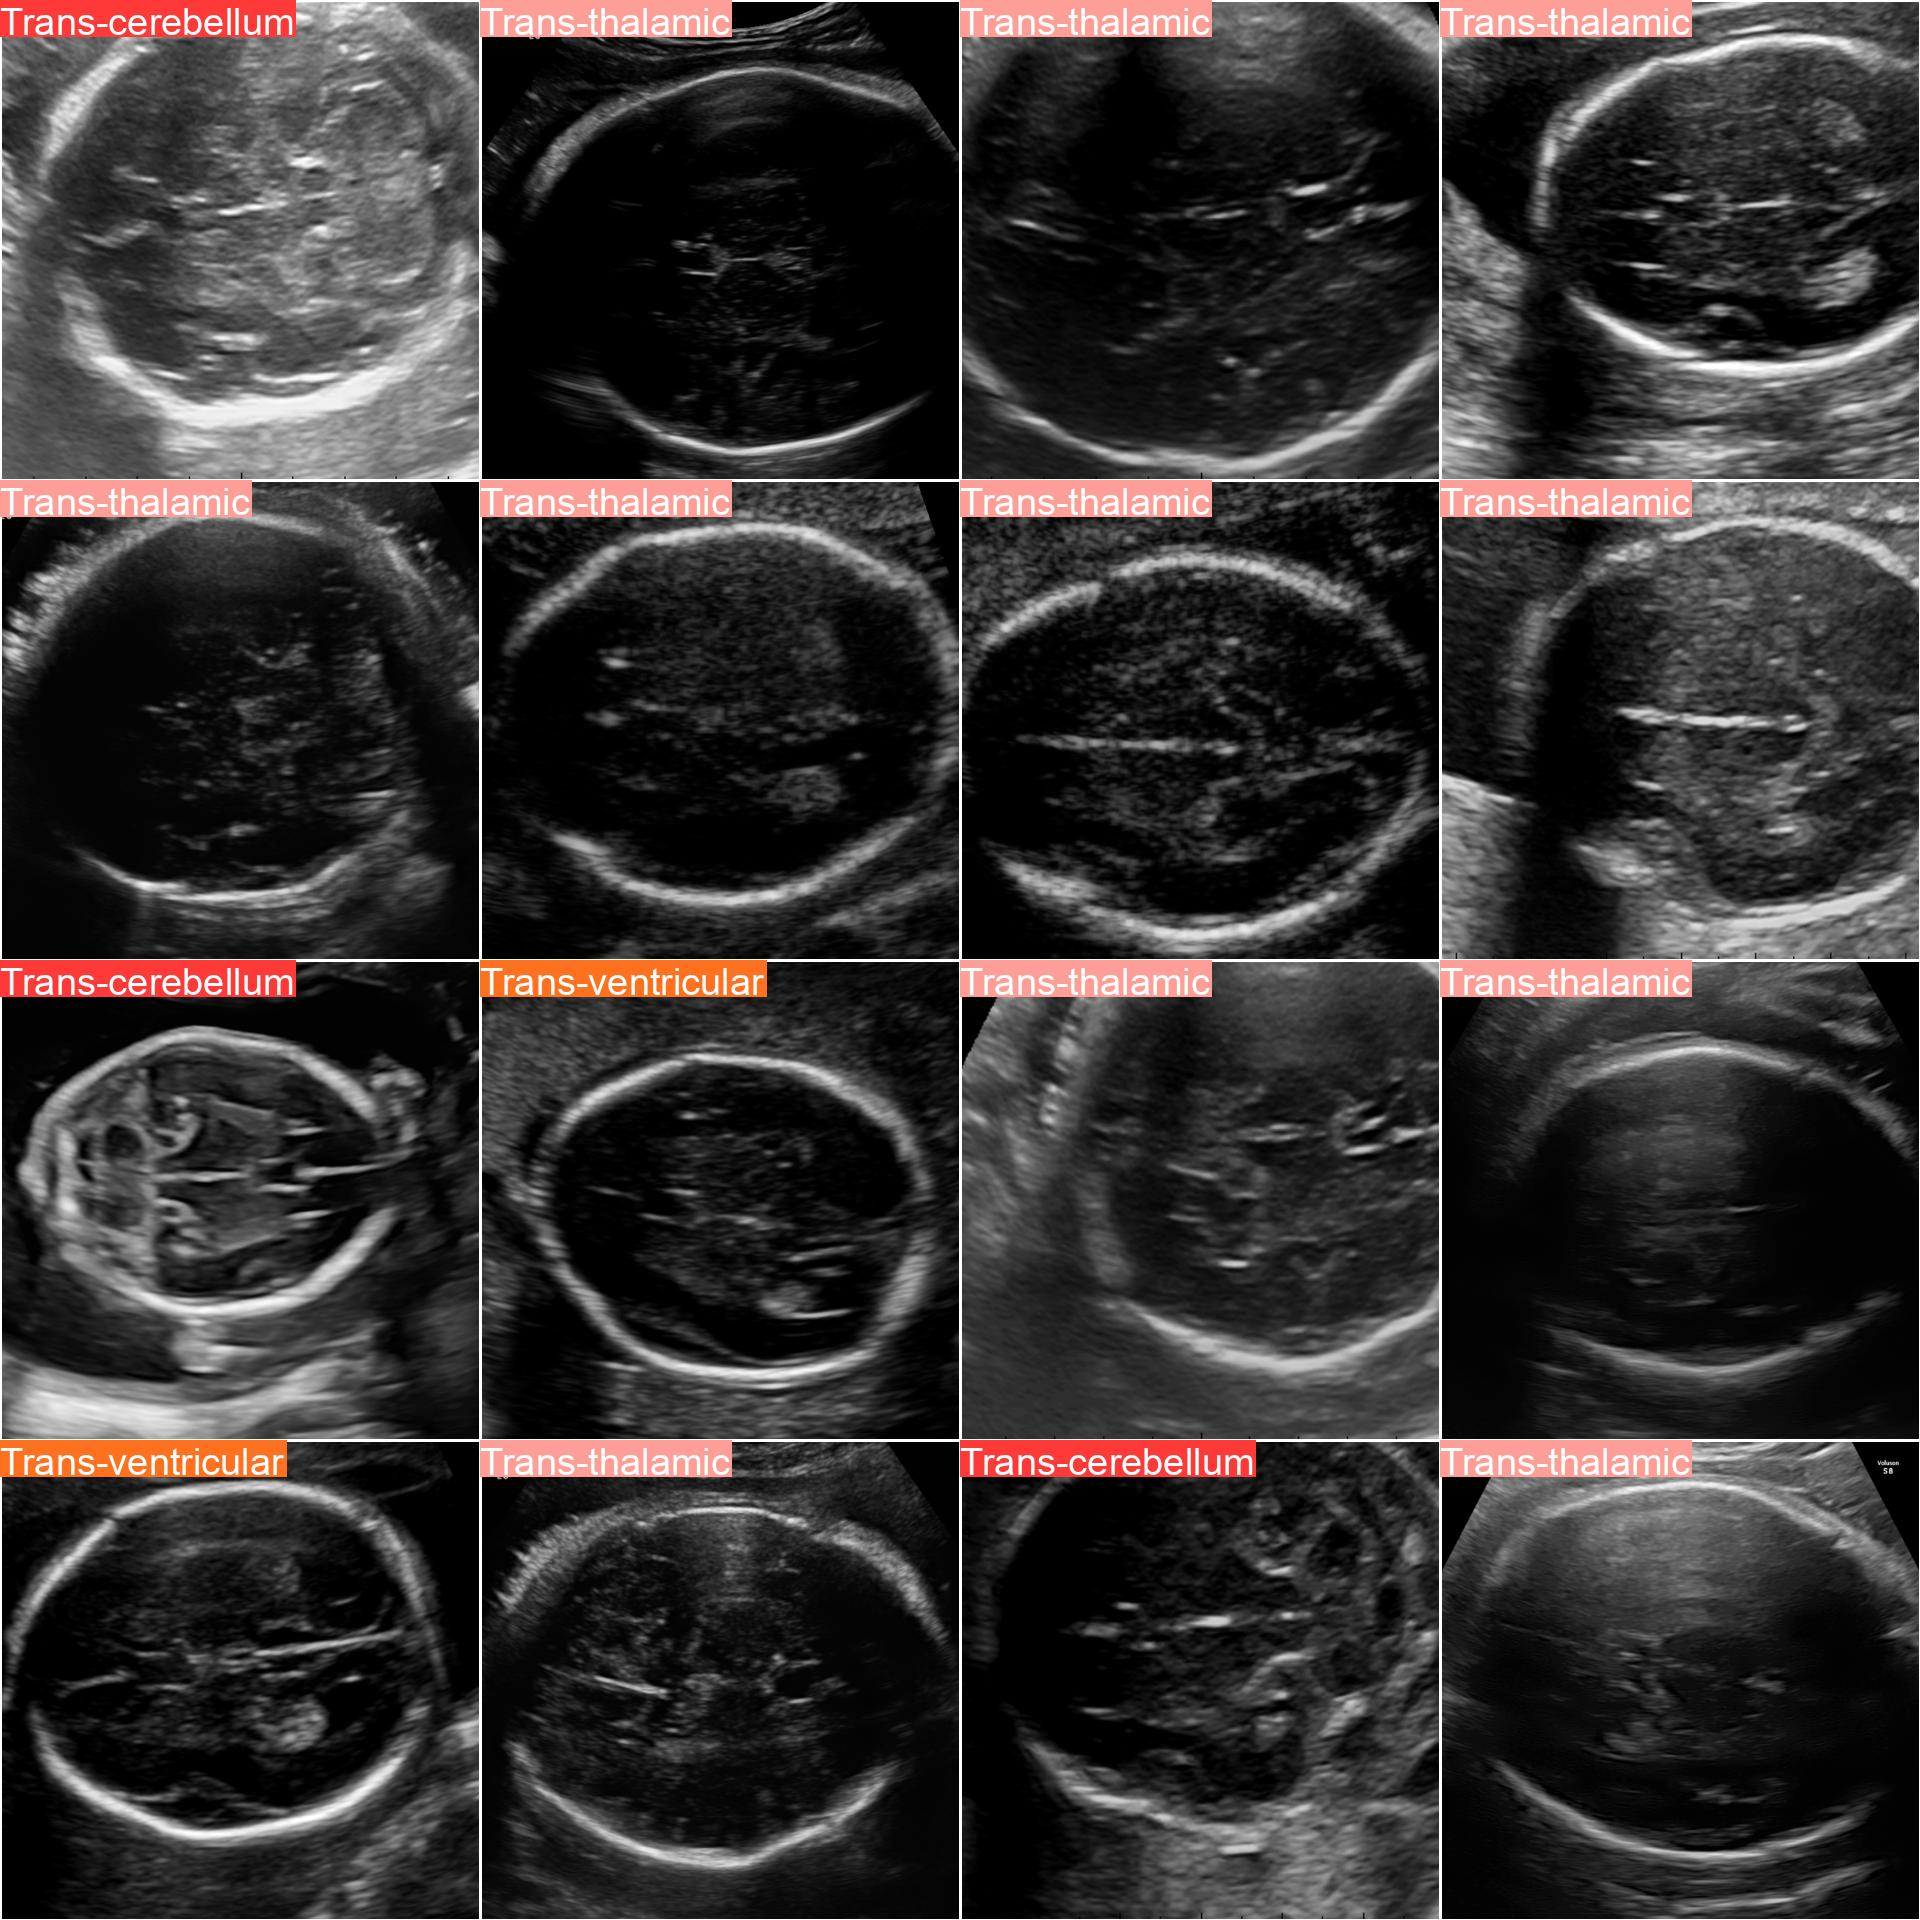

In [10]:

Image(filename=f'/kaggle/working/runs/classify/train3/val_batch1_pred.jpg', width=600)



In [7]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="f6RrLTxt0MqJTVWXSWVY")
project = rf.workspace("eya-ben-moulehem-o10rs").project("fetal-brain-ultrasound-fdoq1")
version = project.version(2)
dataset = version.download("yolov8")
                

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.3 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fetal-Brain-ultrasound-2 in yolov8:: 100%|██████████| 13160/13160 [00:01<00:00, 7898.36it/s] 


# **CSP and LV Detection**

Building on the plane classification model, we leveraged the learned weights to enhance the detection of anomalies in the Cavum Septi Pellucidi (CSP) and Lateral Ventricles (LV).

By transferring these weights, which encapsulate the model's understanding of the different ultrasound planes, we provided the CSP and LV detection model with a strong starting point.

This transfer learning approach allowed the model to focus on identifying subtle anomalies with greater accuracy, as it already possessed the contextual knowledge of the planes. 

As a result, the model was able to achieve more reliable and efficient detection of CSP and LV anomalies, further improving our diagnostic capabilities.

In [8]:
!yolo train model=yolov8n.yaml data=/kaggle/working/Fetal-Brain-ultrasound-2/data.yaml pretrained=/kaggle/working/runs/classify/train/weights/best.pt epochs=50 imgsz=800 plots=True


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [1]:
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

NameError: name 'Image' is not defined

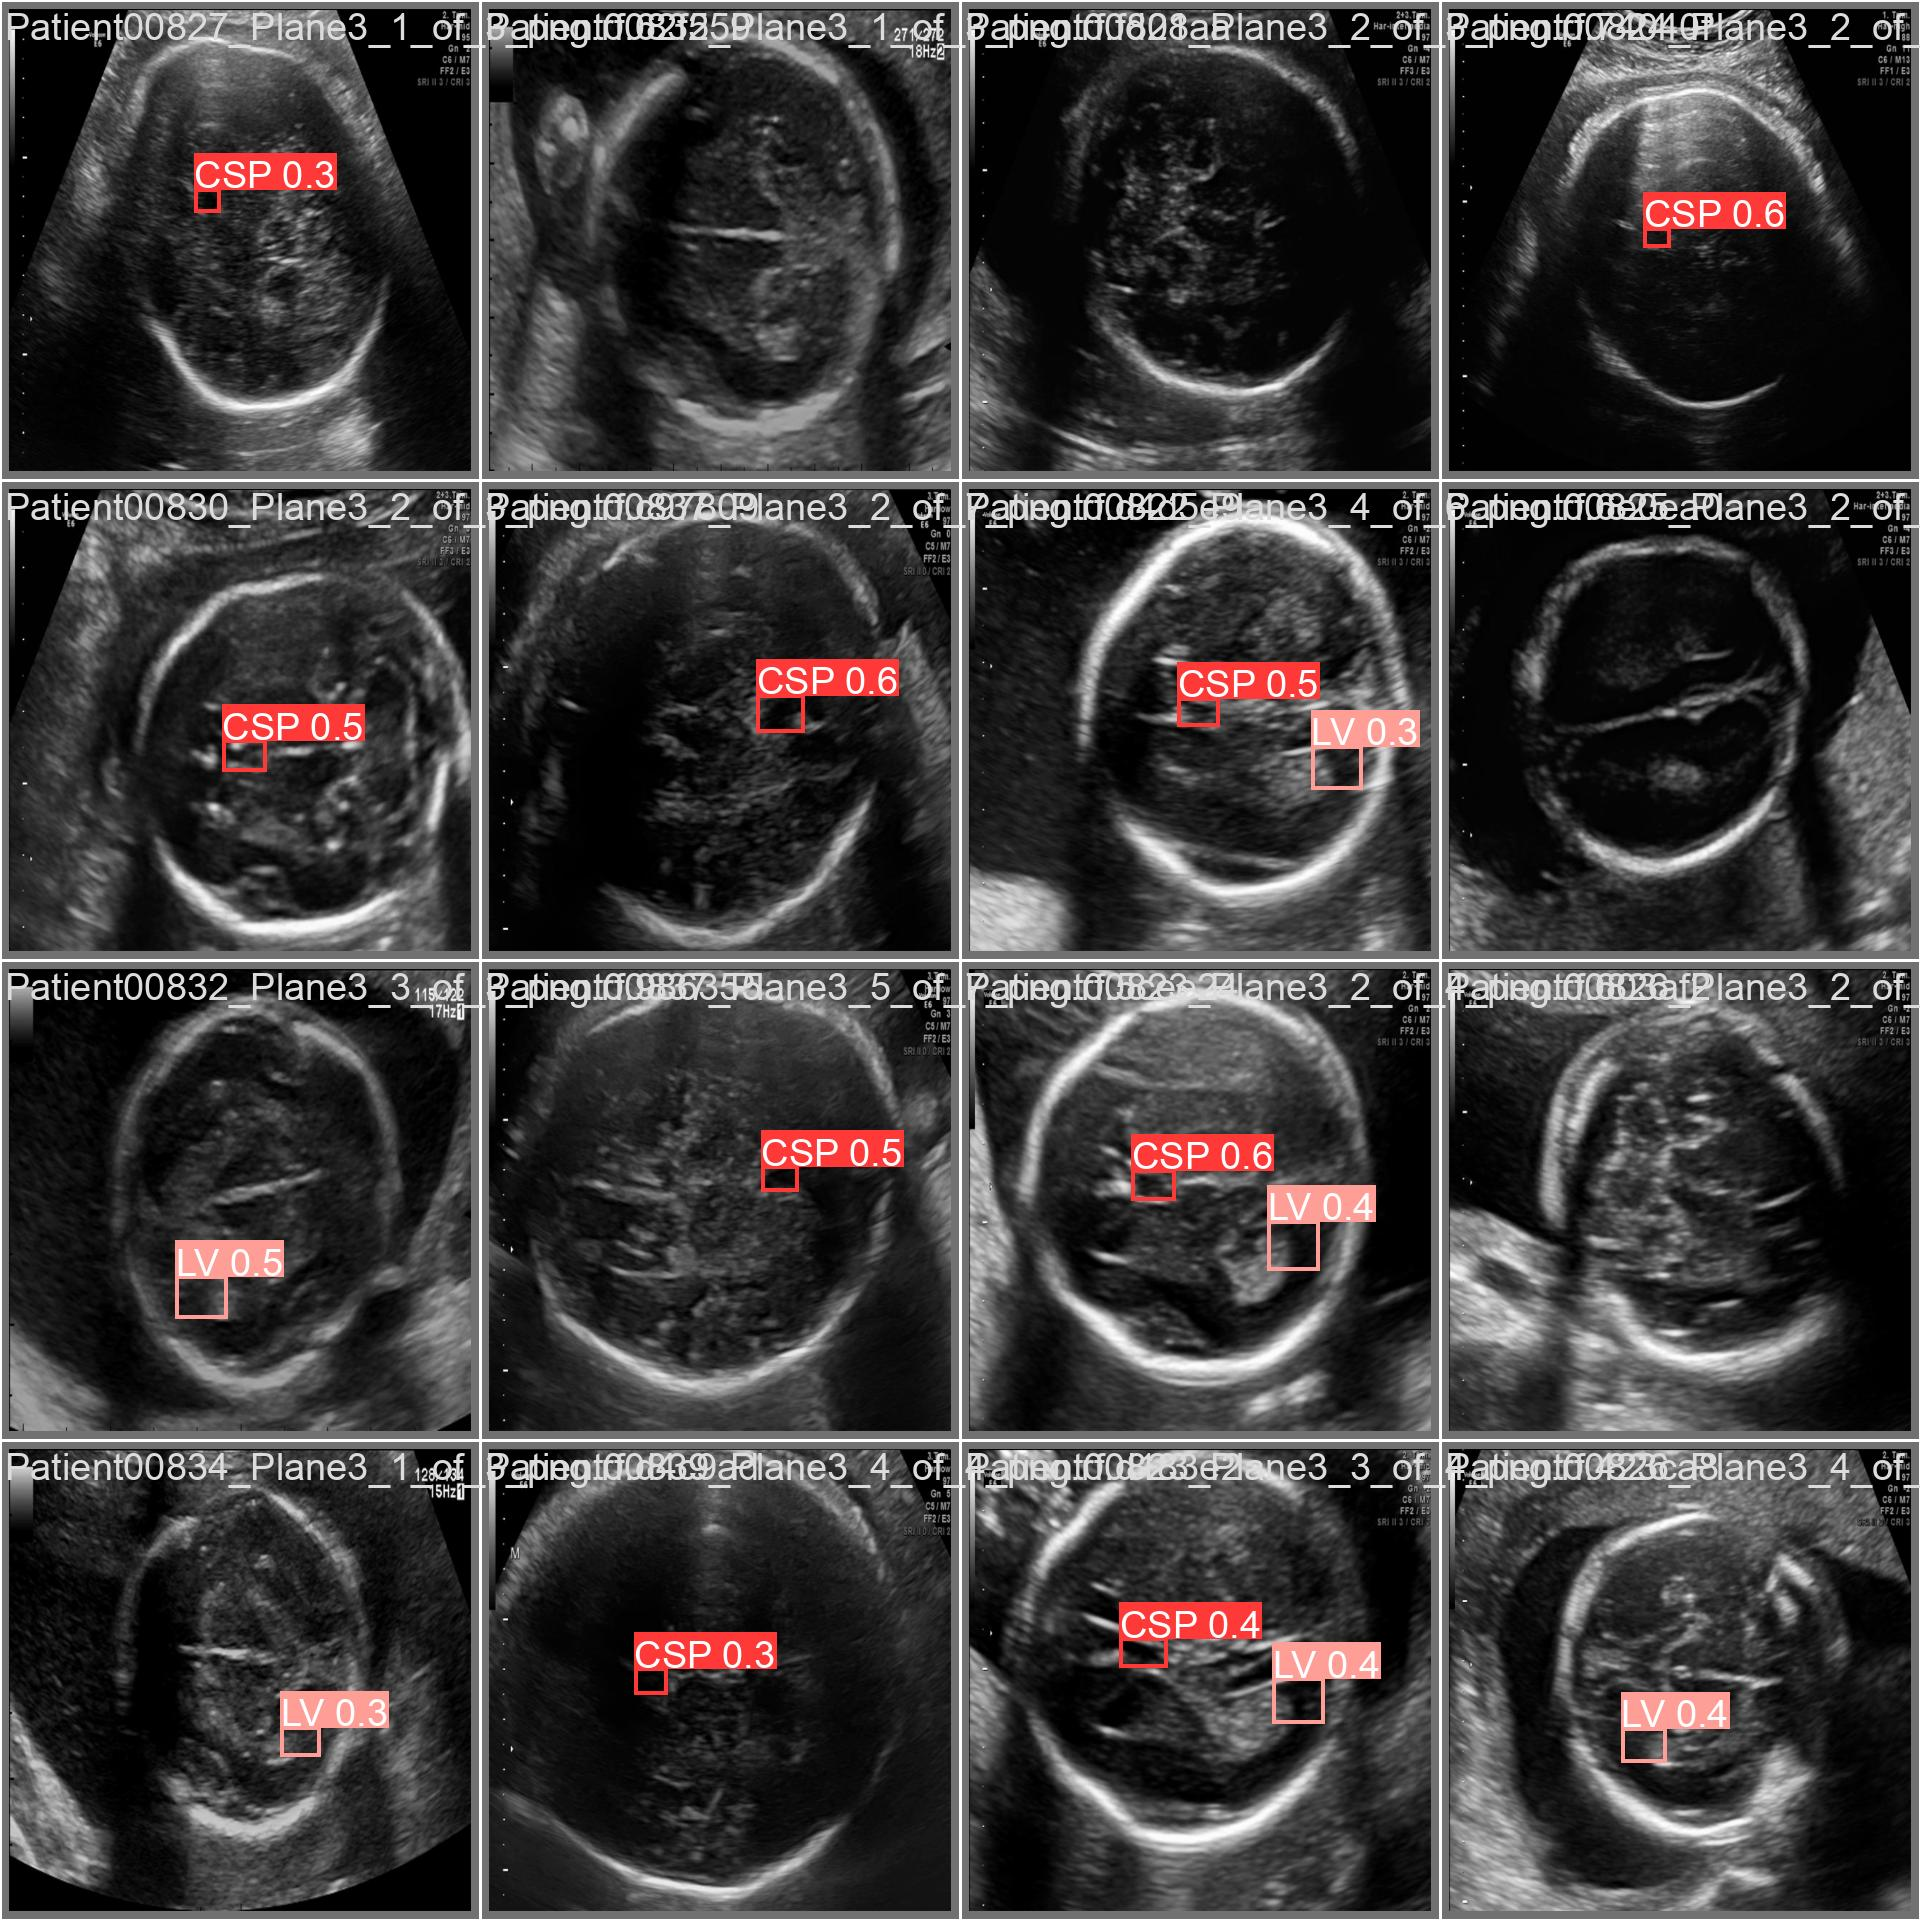

In [13]:
Image(filename=f'/kaggle/working/runs/detect/train3/val_batch2_pred.jpg', width=600)

In [13]:
# Import necessary libraries
from ultralytics import YOLO

# Load the trained model from the best.pt file
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # Adjust the path as necessary

# Perform inference on the test dataset
results = model.predict(source='/kaggle/working/Fetal-Brain-ultrasound-2/test/images', save=True)

# Display the results
for result in results:
    print(f"Image: {result.path}, Predicted Class: {result.names[result.class_id]}, Confidence: {result.confidence}")



image 1/269 /kaggle/working/Fetal-Brain-ultrasound-2/test/images/Patient00216_Plane3_5_of_5_png.rf.46039316ee5ec9ee593172231100d6f0.jpg: 800x800 (no detections), 9.9ms
image 2/269 /kaggle/working/Fetal-Brain-ultrasound-2/test/images/Patient00305_Plane3_2_of_5_png.rf.caae2307eb36ec211b780dddae926186.jpg: 800x800 (no detections), 10.0ms
image 3/269 /kaggle/working/Fetal-Brain-ultrasound-2/test/images/Patient00629_Plane3_1_of_1_png.rf.a7d43b4da3f35a29829a6a6d0599d16b.jpg: 800x800 (no detections), 9.9ms
image 4/269 /kaggle/working/Fetal-Brain-ultrasound-2/test/images/Patient00670_Plane3_1_of_1_png.rf.858738b1af58ddc93a2bddc8b1d6e686.jpg: 800x800 (no detections), 9.9ms
image 5/269 /kaggle/working/Fetal-Brain-ultrasound-2/test/images/Patient00683_Plane3_1_of_2_png.rf.d2f45c55136050d20a89e93d1ef73901.jpg: 800x800 (no detections), 9.9ms
image 6/269 /kaggle/working/Fetal-Brain-ultrasound-2/test/images/Patient00690_Plane3_3_of_4_png.rf.63de7bf4cfe7fb8b47101a1e464ab0ea.jpg: 800x800 (no detection

AttributeError: 'Results' object has no attribute 'class_id'. See valid attributes below.

    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference, and postprocess speeds in milliseconds per image.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

In [15]:
import torch

# Assuming `model` is your YOLO model instance
torch.save(model.state_dict(), "AnomalyDetection.pth")


In [17]:
torch.save(model, 'model.pth')

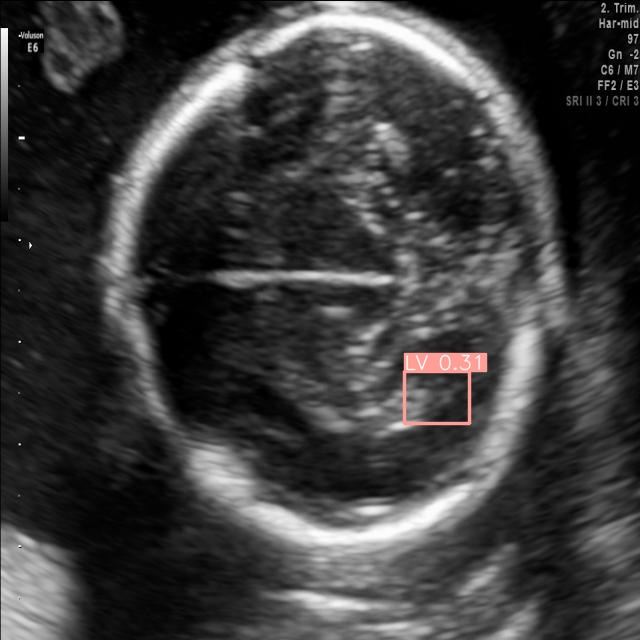

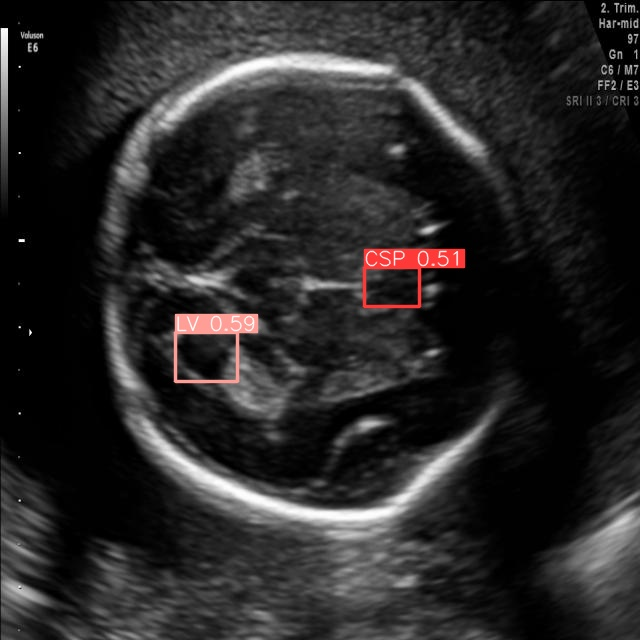

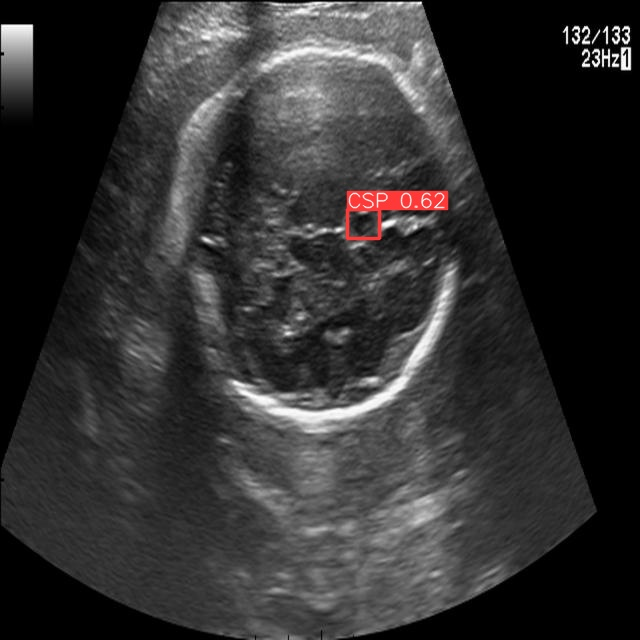

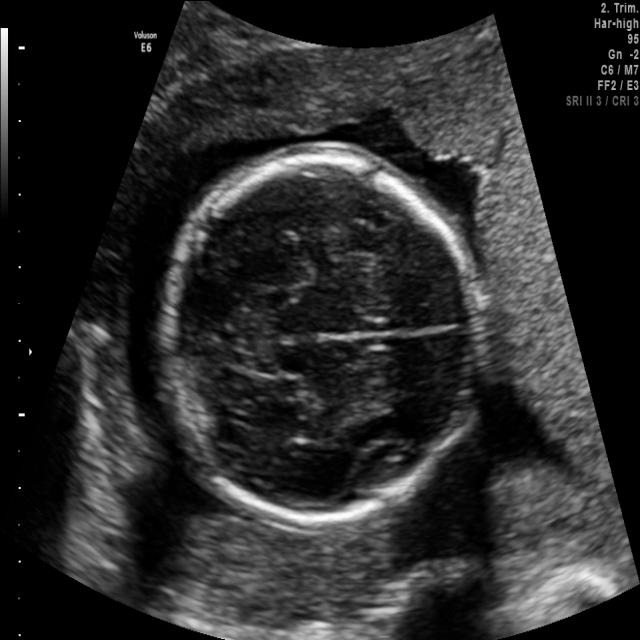

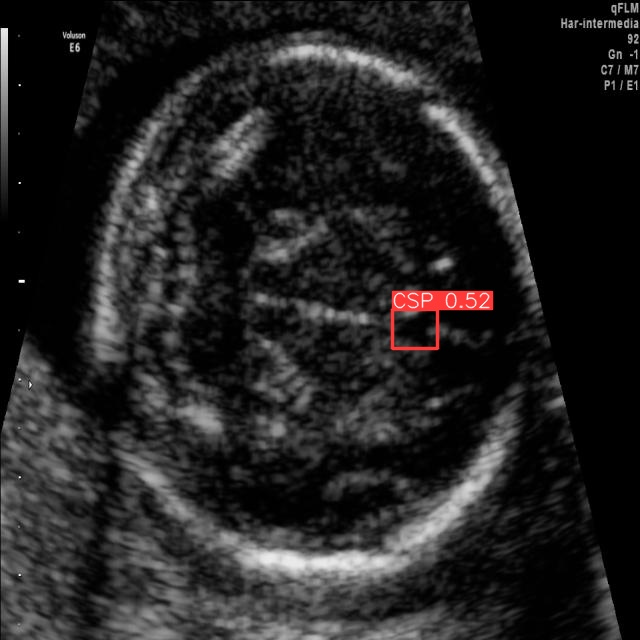

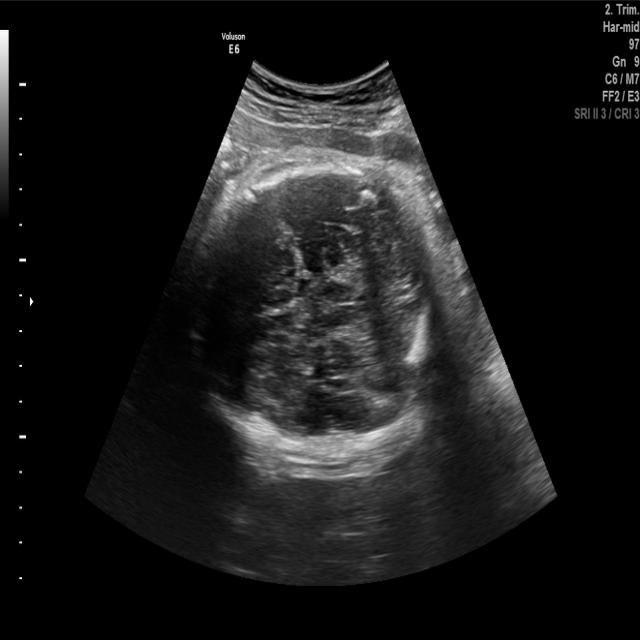

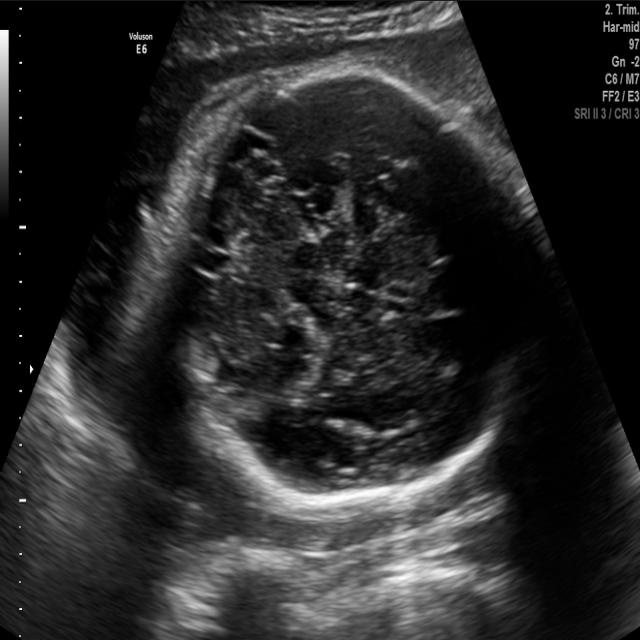

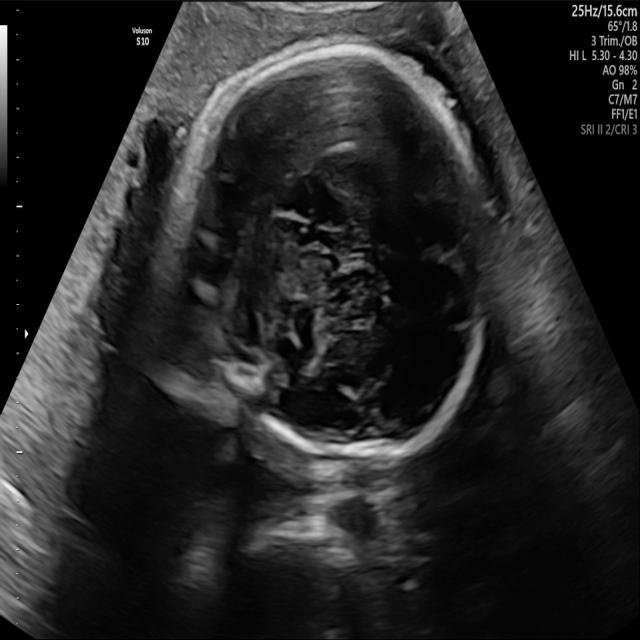

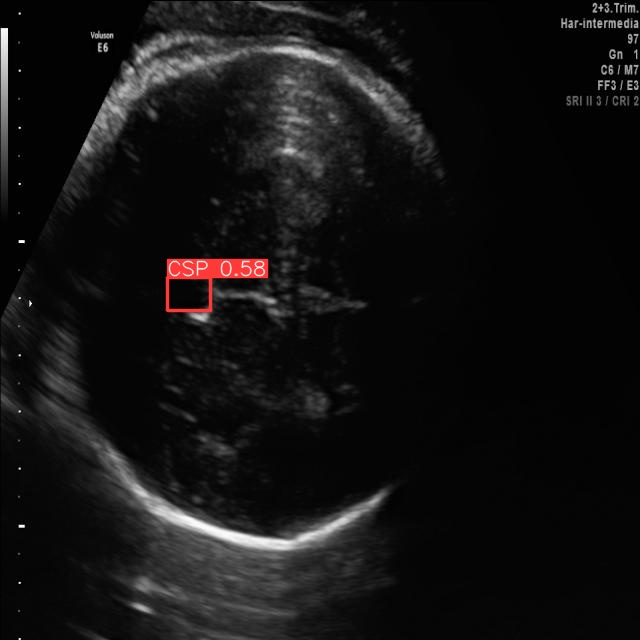

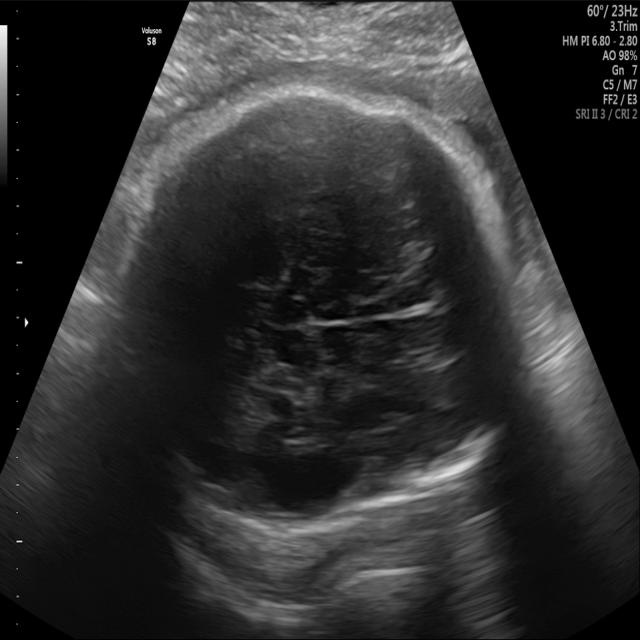

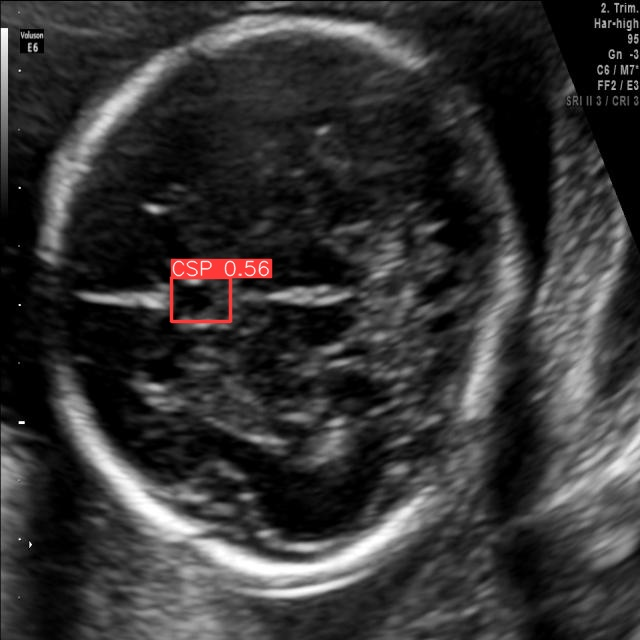

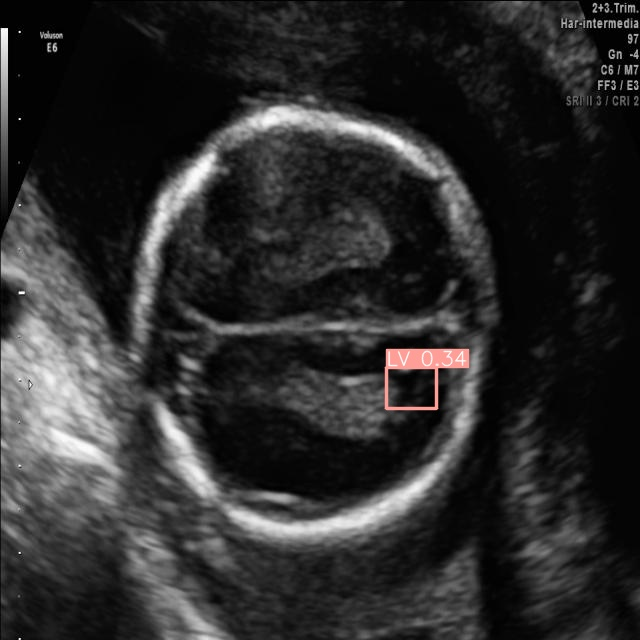

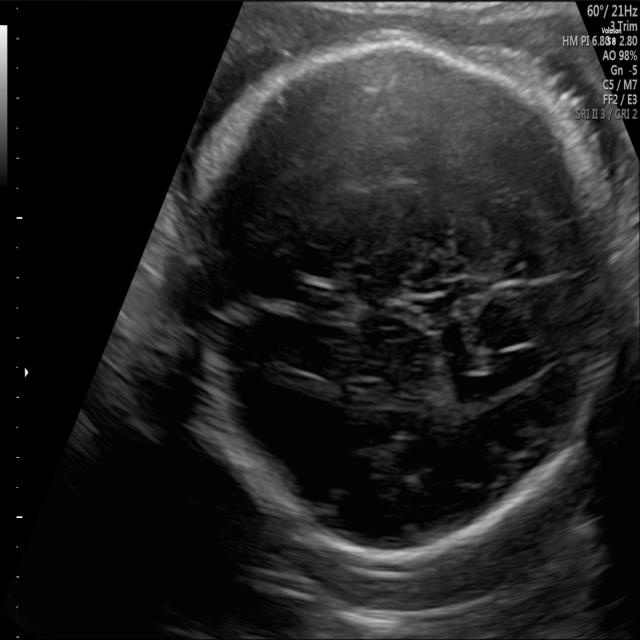

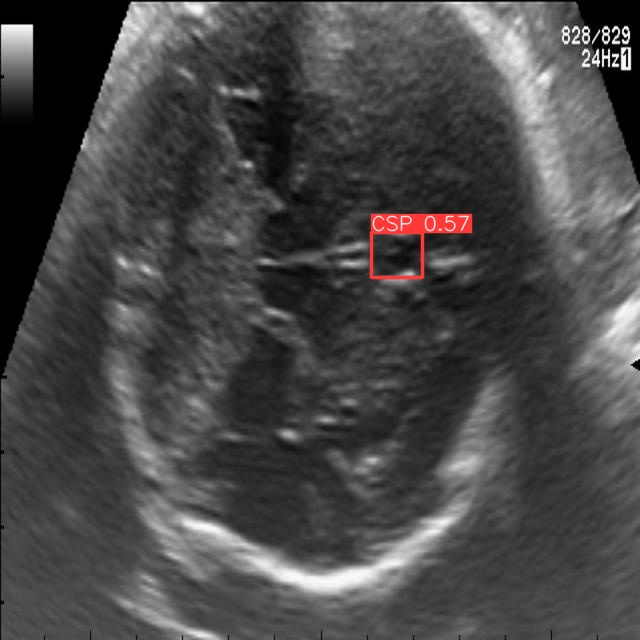

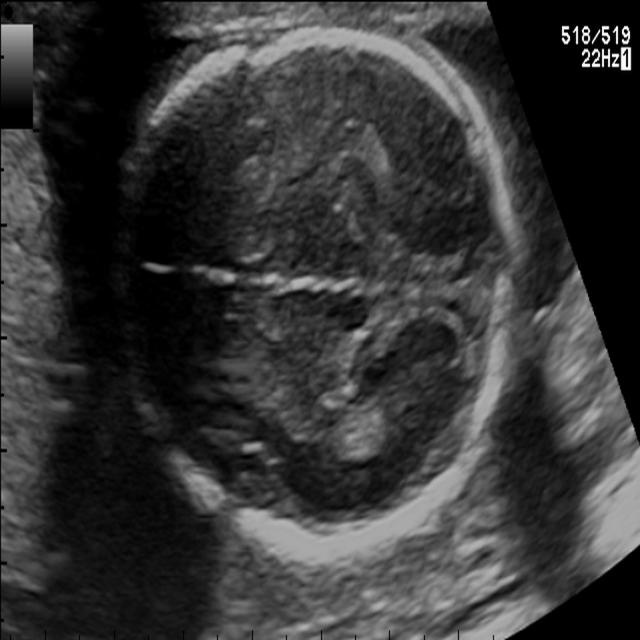

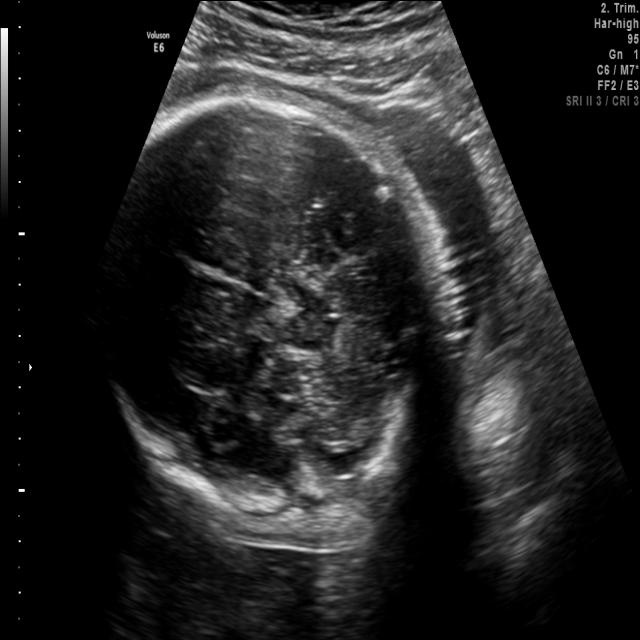

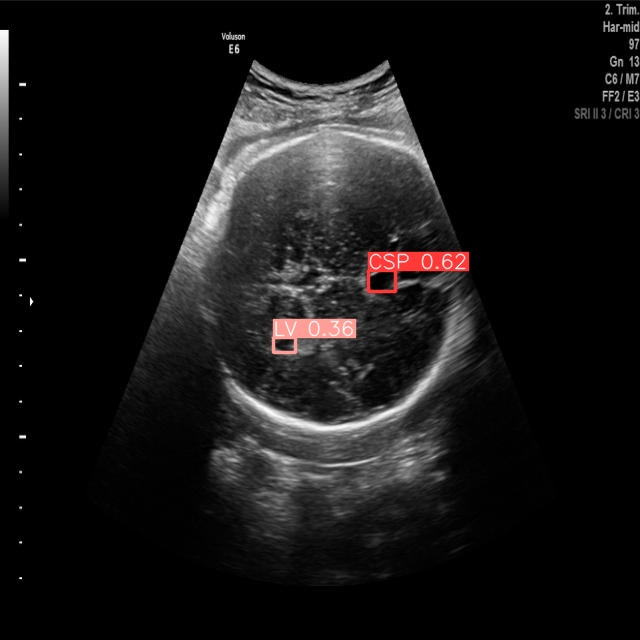

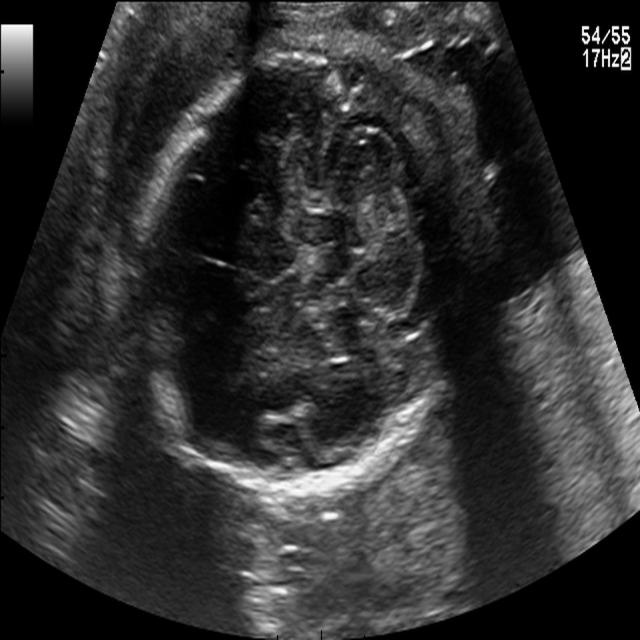

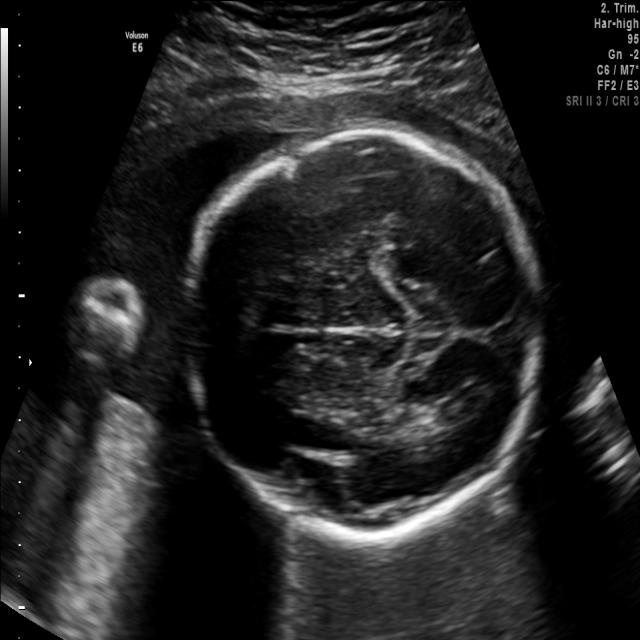

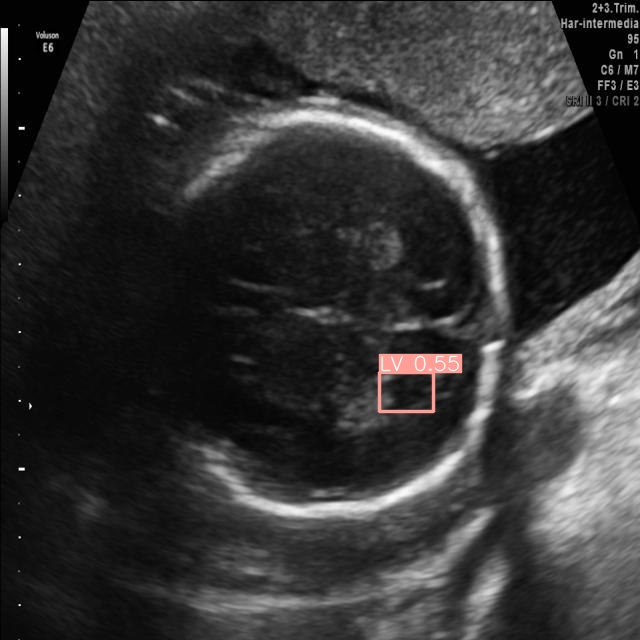

In [18]:
import os
from IPython.display import Image, display

# Path to the directory containing the prediction images
prediction_dir = '/kaggle/working/runs/detect/predict'

# Get a list of image files in the prediction directory
image_files = [f for f in os.listdir(prediction_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display a few of the prediction images
for img_file in image_files[:20]:  # Show first 5 images
    display(Image(filename=os.path.join(prediction_dir, img_file)))


# **Conclusion**

In conclusion, our approach to detecting anomalies in the Cavum Septi Pellucidi (CSP) and Lateral Ventricles (LV) in fetal ultrasounds combines advanced data processing with strategic model training. 

By first ensuring accurate classification of ultrasound planes, we laid a solid foundation for detecting critical anomalies. Leveraging transfer learning, we utilized these classification weights to enhance the CSP and LV detection model, resulting in more precise and reliable anomaly detection. 

This comprehensive strategy not only improves diagnostic accuracy but also contributes to better prenatal care and outcomes, highlighting the potential of AI in advancing medical diagnostics.

In [11]:
import os

data_yaml_path = "/kaggle/working/Fetal-Brain-ultrasound-2/data.yaml"
print("File exists:", os.path.exists(data_yaml_path))


File exists: True


In [7]:
import shutil

# Define source and destination paths
source_path = "/kaggle/input/pretrained-model/Anomaly.pt"
destination_path = "/kaggle/working/Anomaly.pt"

# Copy the file
shutil.copy(source_path, destination_path)

print(f"File copied from {source_path} to {destination_path}")


File copied from /kaggle/input/pretrained-model/Anomaly.pt to /kaggle/working/Anomaly.pt


In [9]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/kaggle/working/Anomaly.pt")

# Export the model to ONNX format
onnx_file_path = "/kaggle/working/yolov8n.onnx"
model.export(format="onnx", imgsz=800)  # You can specify the image size if needed



Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/kaggle/working/Anomaly.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 6, 13125) (6.0 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 0.9s, saved as '/kaggle/working/Anomaly.onnx' (11.8 MB)

Export complete (2.9s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=/kaggle/working/Anomaly.onnx imgsz=800  
Validate:        yolo val task=detect model=/kaggle/working/Anomaly.onnx imgsz=800 data=/kaggle/working/Fetal-Brain-ultrasound-2/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/Anomaly.onnx'